In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")

In [3]:
# Load dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = StandardScaler().fit_transform(data["data"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((120, 4), (120,))

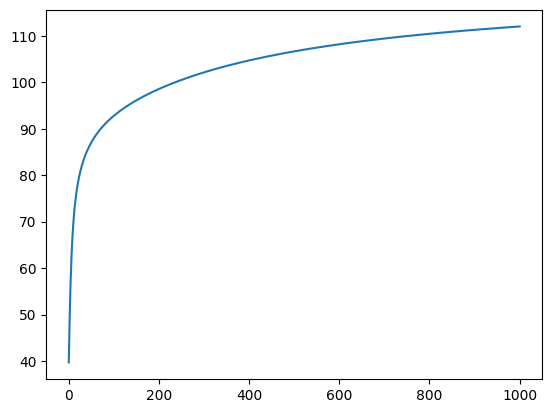

In [4]:
# Build model

from models.multiclass_logistic_regressor import MulticlassLogisticRegressor

m = MulticlassLogisticRegressor().fit(X_train, y_train, n_iter=1000, eta=1.0e-3, lmd=0.5)

# Learning curve
# maximizing the log likelihood of the model
plt.plot(m.loglik_list)

In [5]:
# Accuracy score

from sklearn.metrics import accuracy_score

y_hat = m.predict(X_test)
accuracy_score(y_test, y_hat)

0.9666666666666667

# Comparing to scikit-learn's implementation

In [6]:
from sklearn.linear_model import LogisticRegression

s = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_test, s.predict(X_test))

0.9333333333333333

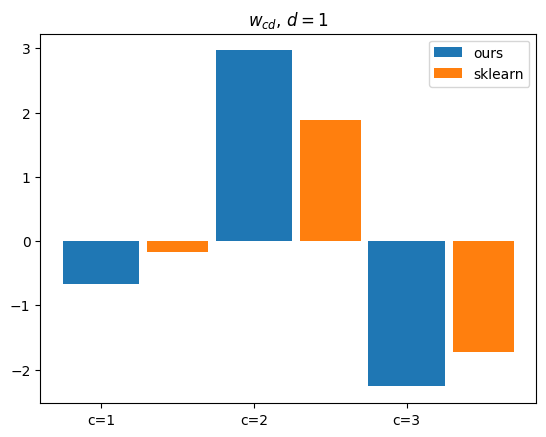

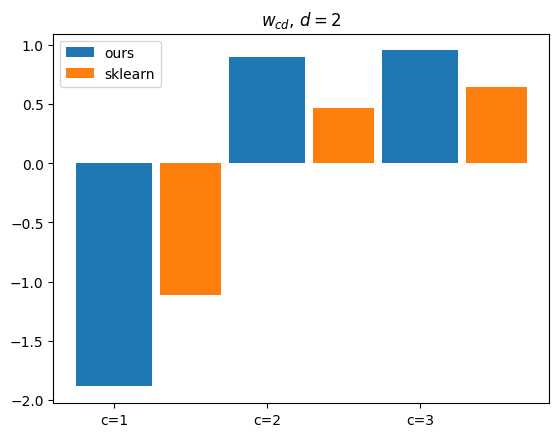

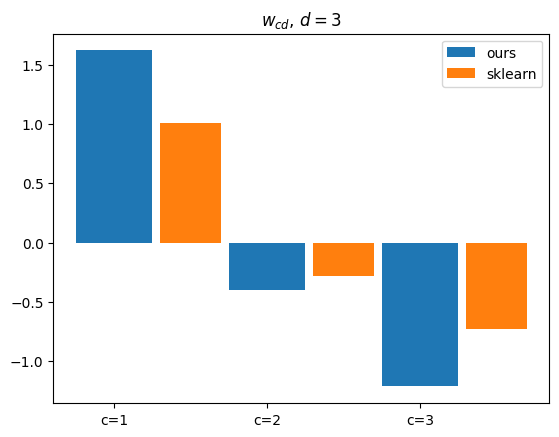

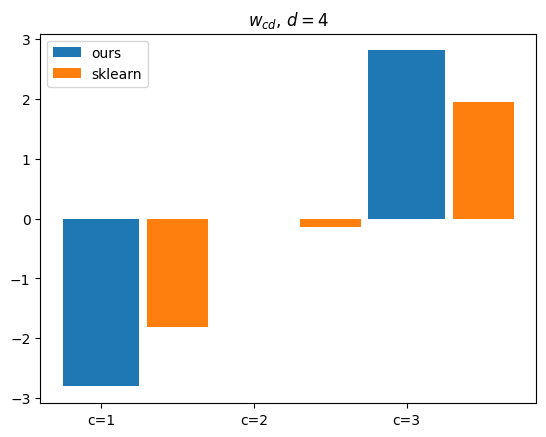

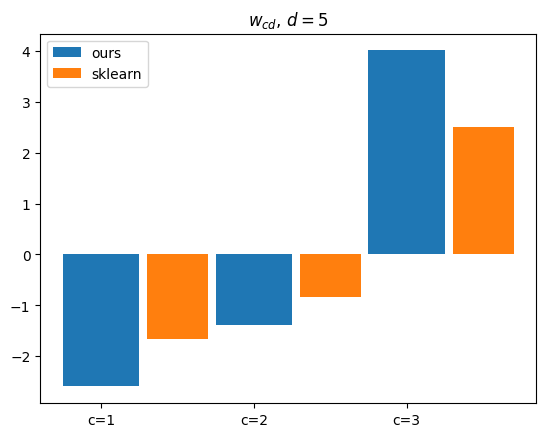

In [7]:
# Comparing weights

W_ours = m.W  # (D, C)
W_scik = np.vstack([s.intercept_, s.coef_.T])  # (D, C)

for d in range(m.X.shape[1]):
    plt.title(r"$w_{cd}$, " + f"$d={d+1}$")
    plt.bar(np.arange(0, 3), W_ours[d], width=0.5, label=f"ours")
    plt.bar(np.arange(0, 3) + 0.5, W_scik[d], width=0.4, label=f"sklearn")
    plt.xticks(np.arange(0, 3), ["c=1", "c=2", "c=3"])
    plt.legend()
    plt.show()